In [ ]:
# Reference: https://www.kaggle.com/code/robikscube/introduction-to-exploratory-data-analysis/notebook

# Exploratory Data Analysis (EDA)

## Step 0.a: Imports

In [2]:
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
pd.options.display.max_columns = 200

## Step 0.b: Reading Data

In [3]:
os.chdir('../data/raw')
df = pd.read_json('movies.json')

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`

In [4]:
df.shape

(46403, 12)

In [5]:
df.head() # first 5 rows

,_id,uid,rank,name,year,certificate,runtime,genre,rating,director,stars,num_votes
0,{'$oid': '643534a6af0a3a14a6861339'},tt0092099,54,Top Gun,1986,PG,109,"[action, drama]",6.9,Tony Scott,"[Tom Cruise, Tim Robbins, Kelly McGillis, Val ...",469891
1,{'$oid': '643534a6af0a3a14a686133a'},tt1877830,55,The Batman,2022,PG-13,176,"[action, crime, drama]",7.8,Matt Reeves,"[Robert Pattinson, Zoë Kravitz, Jeffrey Wright...",689968
2,{'$oid': '643534a6af0a3a14a686133b'},tt0499549,57,Avatar,2009,PG-13,162,"[action, adventure, fantasy]",7.9,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",1334641
3,{'$oid': '643534a6af0a3a14a686133c'},tt5884796,60,Plane,2023,R,107,"[action, adventure, thriller]",6.5,Jean-François Richet,"[Gerard Butler, Mike Colter, Tony Goldwyn, Yos...",45302
4,{'$oid': '643534a6af0a3a14a686133d'},tt1650062,61,Super 8,2011,PG-13,112,"[action, mystery, scifi]",7.0,J.J. Abrams,"[Elle Fanning, AJ Michalka, Kyle Chandler, Joe...",358782


In [6]:
df.tail() # last 5 rows

,_id,uid,rank,name,year,certificate,runtime,genre,rating,director,stars,num_votes
46398,{'$oid': '6435d8bd490bdf896d74fd7b'},tt0015416,9959,Tiger Thompson,1924,Passed,0,[western],0.0,B. Reeves Eason,"[Harry Carey, Marguerite Clayton, John Webb Di...",0
46399,{'$oid': '6435d8bd490bdf896d74fd7c'},tt0163184,9960,Roaring Westward,1949,Passed,58,[western],6.4,Oliver Drake,"[Jimmy Wakely, Dub Taylor, Dennis Moore, Lois ...",23
46400,{'$oid': '6435d8bd490bdf896d74fd7d'},tt0031927,9962,The Singing Cowgirl,1938,Approved,59,"[action, drama, music]",4.8,Samuel Diege,"[Dorothy Page, Dave O'Brien, Vince Barnett, Do...",54
46401,{'$oid': '6435d8bd490bdf896d74fd7e'},tt0019905,9976,The Freckled Rascal,1929,Passed,50,[western],0.0,Louis King,"[Buzz Barton, Milburn Morante, Thomas G. Lingh...",0
46402,{'$oid': '6435d8bd490bdf896d74fd7f'},tt0047690,9993,Yukon Vengeance,1954,Approved,68,"[adventure, western]",5.8,William Beaudine,"[Kirby Grant, Chinook, Monte Hale, Mary Ellen ...",31


In [7]:
df.columns

Index(['_id', 'uid', 'rank', 'name', 'year', 'certificate', 'runtime', 'genre',
       'rating', 'director', 'stars', 'num_votes'],
      dtype='object')

In [8]:
df.dtypes

_id             object
uid             object
rank             int64
name            object
year             int64
certificate     object
runtime          int64
genre           object
rating         float64
director        object
stars           object
num_votes        int64
dtype: object

In [9]:
df.info() # data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46403 entries, 0 to 46402
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          46403 non-null  object 
 1   uid          46403 non-null  object 
 2   rank         46403 non-null  int64  
 3   name         46403 non-null  object 
 4   year         46403 non-null  int64  
 5   certificate  46403 non-null  object 
 6   runtime      46403 non-null  int64  
 7   genre        46403 non-null  object 
 8   rating       46403 non-null  float64
 9   director     46403 non-null  object 
 10  stars        46403 non-null  object 
 11  num_votes    46403 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 4.2+ MB


In [ ]:
# accessing data frame columns
# df[0:2] # first 2 rows
# df[:4] # first 4 rows hiding left index
# df['rating'] # column 'rating'
# df[['runtime', 'rating']] # columns 'runtime' and 'rating'
# df.iloc[0:4, 1:4] # first 4 rows and columns 1 to 3
# df.loc[0:4, ['runtime', 'rating']] # first 4 rows and columns 'runtime' and 'rating'
# df[df.runtime > 120] # rows where runtime is greater than 120 minutes
# df[(df.runtime > 120) & (df.rating > 6.0)] # rows where runtime is greater than 120 minutes and rating is greater than 6.0

In [ ]:
# classifying data frame
# df.sort_values('rating', ascending=False) # sort by rating

In [10]:
# Descriptive statistics
df.describe() # summary statistics for numeric columns

,rank,year,runtime,rating,num_votes
count,46403.000000,46403.000000,46403.000000,46403.000000,4.640300e+04
mean,5153.125897,1986.562593,89.209836,6.068065,2.079357e+04
std,2833.983373,90.828465,45.911057,1.463607,8.526113e+04
min,51.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2729.000000,1972.000000,79.000000,5.400000,3.505000e+02
50%,5208.000000,2000.000000,92.000000,6.300000,1.566000e+03
75%,7629.000000,2013.000000,105.000000,7.000000,7.419000e+03
max,10000.000000,2024.000000,5220.000000,10.000000,2.725886e+06


In [ ]:
# df['rating'].mean() # mean of column 'rating'
# df['rating'].median() # median of column 'rating'
# df['rating'].mode() # mode of column 'rating'
# df['rating'].std() # standard deviation of column 'rating'
# df['rating'].var() # variance of column 'rating'

# df['rating'].describe() # summary statistics of column 'rating'

In [11]:
# Frequency Tables
df['certificate'].value_counts() # absolute frequency table of column 'certificate'

certificate
Not Rated    11570
R            11134
Approved      4682
PG-13         4360
PG            4086
Passed        3548
Unrated       1872
G             1494
M              718
T              627
E              369
14             272
12             226
Livre          221
16             209
E10+           198
TV-Y7-FV       153
GP             118
X               92
10              85
18              83
NC-17           56
16+             40
active          37
AO              27
M/PG            27
13+             23
K-A             22
18+              9
TV-13            9
F                9
MA-13            7
MA-17            4
GA               4
Open             4
L                3
abandoned        2
(Banned)         1
EM               1
delayed          1
Name: count, dtype: int64

In [12]:
(df['certificate'].value_counts() / df['certificate'].count()) * 100 # relative frequency table of column 'certificate'

certificate
Not Rated    24.933733
R            23.994138
Approved     10.089865
PG-13         9.395944
PG            8.805465
Passed        7.646057
Unrated       4.034222
G             3.219619
M             1.547314
T             1.351206
E             0.795207
14            0.586169
12            0.487037
Livre         0.476262
16            0.450402
E10+          0.426697
TV-Y7-FV      0.329720
GP            0.254294
X             0.198263
10            0.183178
18            0.178868
NC-17         0.120682
16+           0.086201
active        0.079736
AO            0.058186
M/PG          0.058186
13+           0.049566
K-A           0.047411
18+           0.019395
TV-13         0.019395
F             0.019395
MA-13         0.015085
MA-17         0.008620
GA            0.008620
Open          0.008620
L             0.006465
abandoned     0.004310
(Banned)      0.002155
EM            0.002155
delayed       0.002155
Name: count, dtype: float64

In [14]:
# Cross Tabulation
pd.crosstab(df['certificate'], df['rating']) # cross tabulation of columns 'certificate' and 'genre'

rating,0.0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,10.0
certificate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Banned),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,1,1,2,0,0,1,1,1,3,0,1,1,7,2,3,3,4,3,4,6,1,3,4,4,1,3,4,2,2,2,2,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0
12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,1,0,0,0,0,0,1,3,1,3,0,2,2,2,2,0,3,2,2,6,3,3,5,5,4,6,4,6,7,6,9,3,14,8,9,11,6,13,9,5,4,4,7,9,1,3,5,6,3,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0
13+,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,1,3,3,0,0,2,2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,2,2,1,1,0,1,1,3,2,1,3,4,5,2,5,7,5,6,12,14,10,14,16,9,17,12,16,8,13,15,8,10,7,3,2,2,7,5,0,2,5,2,2,1,0,0,0,1,1,0,0,0,0,0,0,0
16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0,1,1,0,0,1,0,3,2,1,1,2,1,4,2,0,0,1,3,2,0,3,2,1,5,3,7,4,4,5,12,9,13,8,12,12,9,7,12,6,7,7,6,7,3,5,3,1,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16+,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,1,0,1,2,1,1,2,4,0,1,0,1,0,2,1,1,1,1,0,1,2,2,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,2,2,0,1,1,0,0,1,1,0,0,1,3,0,3,2,2,3,2,2,2,1,4,4,3,1,2,4,2,4,1,5,0,3,4,5,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18+,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Correlation
df.corr() # correlation matrix

TypeError: float() argument must be a string or a number, not 'dict'

## Step 2: Data Preparation

- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [16]:
# Example of dropping columns
df.drop(['rank'], axis=1)

,_id,uid,name,year,certificate,runtime,genre,rating,director,stars,num_votes
0,{'$oid': '643534a6af0a3a14a6861339'},tt0092099,Top Gun,1986,PG,109,"[action, drama]",6.9,Tony Scott,"[Tom Cruise, Tim Robbins, Kelly McGillis, Val ...",469891
1,{'$oid': '643534a6af0a3a14a686133a'},tt1877830,The Batman,2022,PG-13,176,"[action, crime, drama]",7.8,Matt Reeves,"[Robert Pattinson, Zoë Kravitz, Jeffrey Wright...",689968
2,{'$oid': '643534a6af0a3a14a686133b'},tt0499549,Avatar,2009,PG-13,162,"[action, adventure, fantasy]",7.9,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",1334641
3,{'$oid': '643534a6af0a3a14a686133c'},tt5884796,Plane,2023,R,107,"[action, adventure, thriller]",6.5,Jean-François Richet,"[Gerard Butler, Mike Colter, Tony Goldwyn, Yos...",45302
4,{'$oid': '643534a6af0a3a14a686133d'},tt1650062,Super 8,2011,PG-13,112,"[action, mystery, scifi]",7.0,J.J. Abrams,"[Elle Fanning, AJ Michalka, Kyle Chandler, Joe...",358782
...,...,...,...,...,...,...,...,...,...,...,...
46398,{'$oid': '6435d8bd490bdf896d74fd7b'},tt0015416,Tiger Thompson,1924,Passed,0,[western],0.0,B. Reeves Eason,"[Harry Carey, Marguerite Clayton, John Webb Di...",0
46399,{'$oid': '6435d8bd490bdf896d74fd7c'},tt0163184,Roaring Westward,1949,Passed,58,[western],6.4,Oliver Drake,"[Jimmy Wakely, Dub Taylor, Dennis Moore, Lois ...",23
46400,{'$oid': '6435d8bd490bdf896d74fd7d'},tt0031927,The Singing Cowgirl,1938,Approved,59,"[action, drama, music]",4.8,Samuel Diege,"[Dorothy Page, Dave O'Brien, Vince Barnett, Do...",54
46401,{'$oid': '6435d8bd490bdf896d74fd7e'},tt0019905,The Freckled Rascal,1929,Passed,50,[western],0.0,Louis King,"[Buzz Barton, Milburn Morante, Thomas G. Lingh...",0


In [17]:
df = df[['_id',
        #  'uid',
         'name',
         'year',
         'certificate',
         'runtime',
        #  'genre',
         'rating',
         'director',
        #  'stars',
         'num_votes']].copy()

In [ ]:
# df['year'] = pd.to_datetime(df['year'], format='%Y')

In [18]:
# Rename our columns
df = df.rename(columns={'_id':'_id',
                   'name':'Title',
                   'year':'Year',
                   'certificate':'Certificate',
                   'runtime':'Runtime',
                   'rating':'Rating',
                   'director':'Director',
                   'num_votes':'Votes'})

In [19]:
df.isna().sum()

_id            0
Title          0
Year           0
Certificate    0
Runtime        0
Rating         0
Director       0
Votes          0
dtype: int64

In [ ]:
df.loc[df.duplicated()]

In [21]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=['Title'])].head()

,_id,Title,Year,Certificate,Runtime,Rating,Director,Votes
123,{'$oid': '643534a6af0a3a14a68613b4'},The Magnificent Seven,1960,Approved,128,7.7,John Sturges,97601
174,{'$oid': '643534a6af0a3a14a68613e7'},Dune,1984,PG-13,137,6.3,David Lynch,164832
321,{'$oid': '643534a6af0a3a14a686147a'},The Mummy,2017,PG-13,110,5.4,Alex Kurtzman,195217
417,{'$oid': '643534a6af0a3a14a68614da'},Total Recall,2012,PG-13,118,6.2,Len Wiseman,258789
445,{'$oid': '643534a6af0a3a14a68614f6'},RoboCop,2014,PG-13,117,6.1,José Padilha,232554


In [23]:
# Checking an example duplicate
df.query('Title == "Dune"')

,_id,Title,Year,Certificate,Runtime,Rating,Director,Votes
7,{'$oid': '643534a6af0a3a14a6861340'},Dune,2021,PG-13,155,8.0,Denis Villeneuve,662002
174,{'$oid': '643534a6af0a3a14a68613e7'},Dune,1984,PG-13,137,6.3,David Lynch,164832
6227,{'$oid': '643539b9af0a3a14a6862db8'},Dune,2000,Not Rated,265,6.9,,23334


In [24]:
df.columns

Index(['_id', 'Title', 'Year', 'Certificate', 'Runtime', 'Rating', 'Director',
       'Votes'],
      dtype='object')

In [25]:
df = df.loc[~df.duplicated(subset=['Title','Year','Director'])] \
    .reset_index(drop=True).copy()

## Step 3: Feature Understanding
### (Univariate analysis)

- Plotting Feature Distributions
- Histogram
- KDE
- Boxplot

In [26]:
df['Director'].value_counts()

Director
                      2417
Sam Newfield           145
Lesley Selander        116
Joseph Kane            101
Lambert Hillyer         86
                      ... 
Ravin Gandhi             1
Larry Gross              1
Nick Searcy              1
Tony McNamara            1
Maurice G. O'Neill       1
Name: count, Length: 17333, dtype: int64

Text(0, 0.5, 'Count')

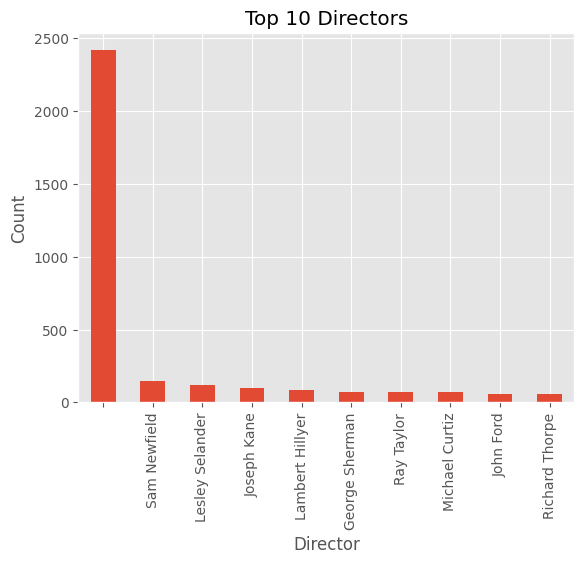

In [27]:
ax = df['Director'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Directors')
ax.set_xlabel('Director')
ax.set_ylabel('Count')

Text(0.5, 0, 'Rating')

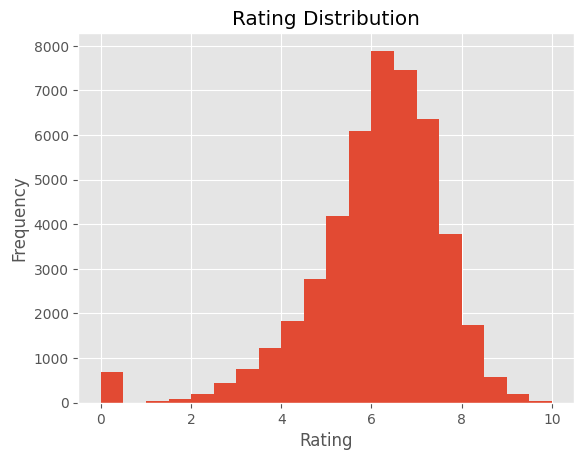

In [29]:
ax = df['Rating'].plot(kind='hist',
                          bins=20,
                          title='Rating Distribution')
ax.set_xlabel('Rating')

Text(0.5, 0, 'Rating')

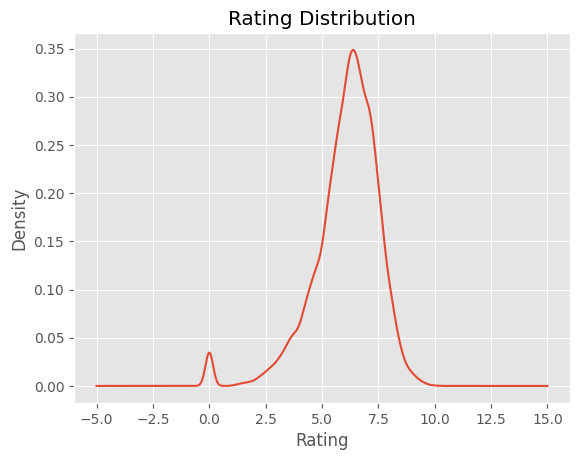

In [30]:
ax = df['Rating'].plot(kind='kde',
                          title='Rating Distribution')
ax.set_xlabel('Rating')

In [31]:
df['Year'].value_counts()

Year
2014    1373
2015    1333
2016    1303
2013    1302
2012    1257
        ... 
1903       1
1899       1
1907       1
1891       1
1904       1
Name: count, Length: 130, dtype: int64

## Step 4: Feature Relationships

- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

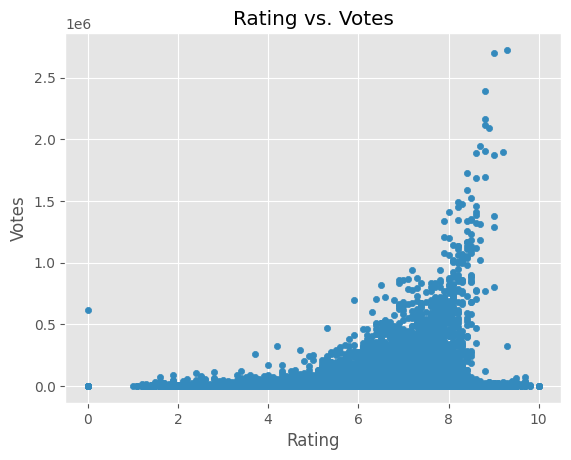

In [32]:
df.plot(kind='scatter',
        x='Rating',
        y='Votes',
        title='Rating vs. Votes')
plt.show()

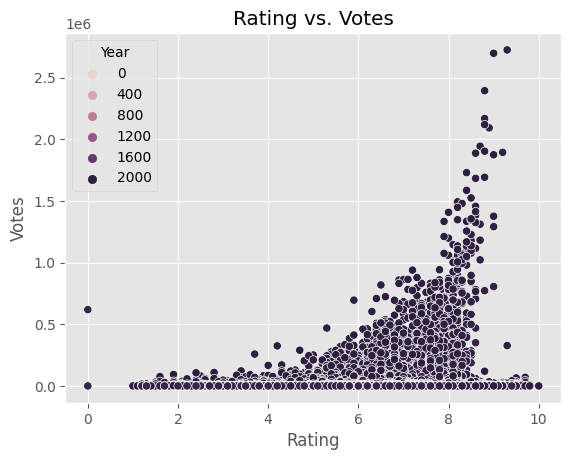

In [35]:
ax = sns.scatterplot(x='Rating',
                y='Votes',
                hue='Year',
                data=df)
ax.set_title('Rating vs. Votes')
plt.show()

In [ ]:
sns.pairplot(df,
             vars=['Certificate','Rating','Votes'],
            hue='Year')
plt.show()

In [37]:
df_corr = df[['Year','Rating','Votes']].dropna().corr()
df_corr

,Year,Rating,Votes
Year,1.000000,0.162853,0.042382
Rating,0.162853,1.000000,0.168206
Votes,0.042382,0.168206,1.000000


<Axes: >

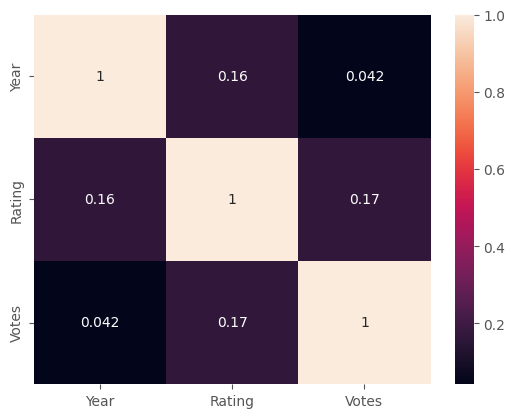

In [38]:
sns.heatmap(df_corr, annot=True)

## Step 5: Ask a Question about the data

- Try to answer a question you have about the data using a plot or statistic.

1. _What is the top 3 for the most rated directors?_

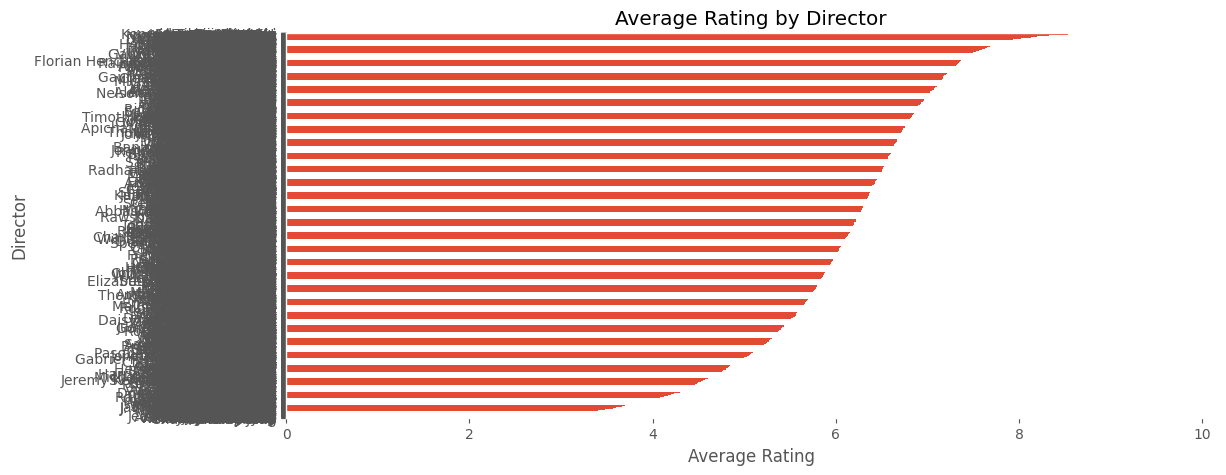

In [40]:
ax = df.query('Director != ""') \
    .groupby('Director')['Rating'] \
    .agg(['mean','count']) \
    .query('count >= 3') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Rating by Director')
ax.set_xlabel('Average Rating')
plt.show()